In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg01'], df['wt01'] = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

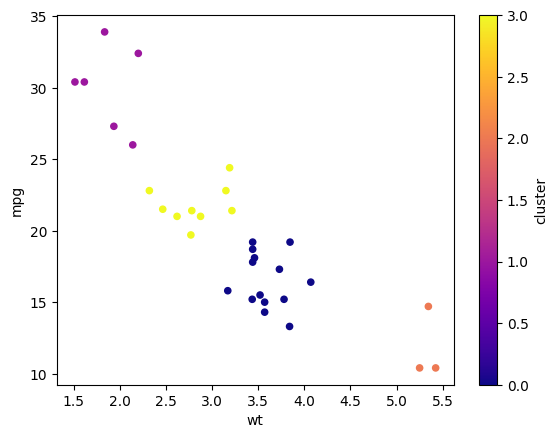

In [14]:
k = KMeans(n_clusters=4, random_state=1).fit(df[['mpg01', 'wt01']])
df['cluster'] = k.labels_
df.plot.scatter(x='wt', y='mpg',c='cluster',colormap='plasma')

In [15]:
### RFM
rf = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/db_Exercicio_RFM.csv")
rf

,Unnamed: 0,CUSTOMER_ID,STORE_ID,PRODUCT_ID,AMOUNT,DATE
0,1,95595791691,409,196282,8.98,2020-01-01 00:14:41 UTC
1,2,8814812624,62,136956,0.00,2020-01-01 00:10:16 UTC
2,3,38552620634,408,329,9.98,2020-01-01 00:08:29 UTC
3,4,11561694614,405,104089,7.99,2020-01-01 00:06:10 UTC
4,5,1216506698,62,196180,11.96,2020-01-01 00:05:30 UTC
...,...,...,...,...,...,...
92289,92290,10264569679,417,160178,2.15,2019-11-08 10:29:32 UTC
92290,92291,74199480625,405,194991,2.99,2019-11-08 10:29:22 UTC
92291,92292,60400722615,415,185621,4.30,2019-11-08 10:27:06 UTC
92292,92293,3623837660,65,193506,6.29,2019-11-08 10:16:58 UTC


<Axes: xlabel='sum', ylabel='count'>

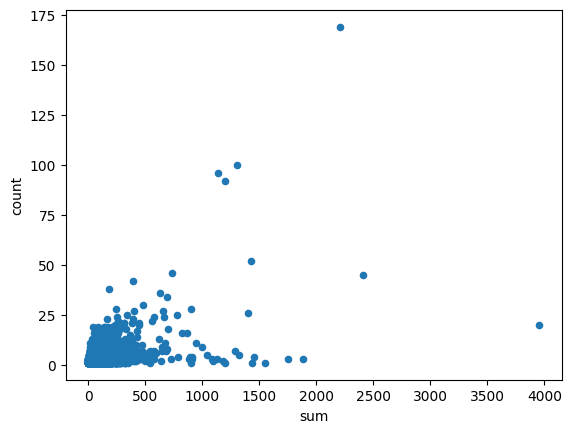

In [21]:
DFagg = rf.groupby(by=["CUSTOMER_ID"])["AMOUNT"].agg(['sum','count'])
DFagg.plot.scatter(x='sum', y='count')

array([[<Axes: title={'center': 'count'}>]], dtype=object)

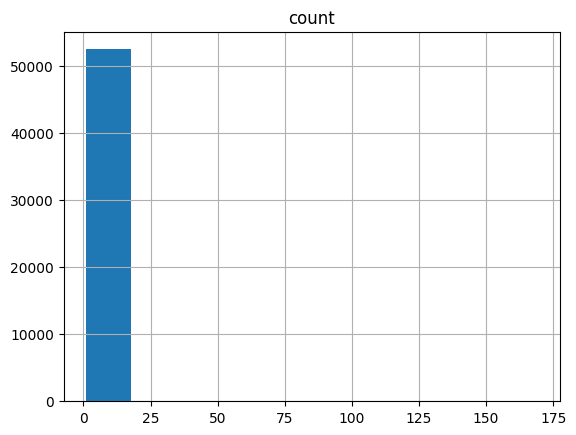

In [22]:
DFagg.hist('count')

array([[<Axes: title={'center': 'logcount'}>]], dtype=object)

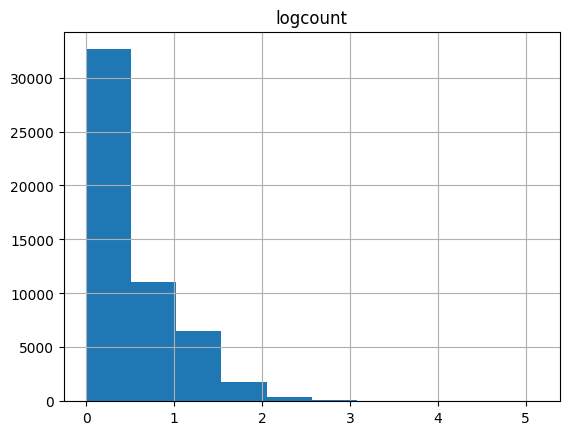

In [23]:
import numpy as np
DFagg['logcount'] = np.log(DFagg['count'])
DFagg.hist('logcount')

In [25]:
di = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv')
di

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [28]:
ndi = di.std()

id = 1

for i in ndi:
  nc = 'std_'+ndi.index[id-1]
  di[nc]=i
  id=id+1

<ipython-input-28-e3f16eca1668>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ndi = di.std()


In [29]:
di

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,std_Unnamed: 0,std_carat,std_depth,std_table,std_price,std_x,std_y,std_z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
